In [1]:
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [3]:
! ls baseline

baseline_test  baseline_train


In [4]:
train_directories = tf.data.Dataset.list_files('baseline/baseline_train/' + '*/*')
test_directories = tf.data.Dataset.list_files('baseline/baseline_train/' + '*/*')

In [5]:
for f in train_directories.take(5):
    print(f.numpy())

b'baseline/baseline_train/PL/234.png'
b'baseline/baseline_train/PL/404.png'
b'baseline/baseline_train/non_PL/677.png'
b'baseline/baseline_train/non_PL/349.png'
b'baseline/baseline_train/non_PL/817.png'


In [6]:
def process_path(file_path):
    label = tf.strings.split(file_path, '/')[-2]
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

In [7]:
new_path = next(iter(train_directories))
image, label = process_path(new_path)

In [60]:
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    plt.axis('off')

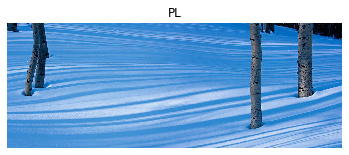

In [61]:
show(image, label)

In [10]:
labeled_train_ds = train_directories.map(process_path)
labeled_test_ds = test_directories.map(process_path)

In [11]:
type(labeled_train_ds)

tensorflow.python.data.ops.dataset_ops.MapDataset

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(b'non_PL', shape=(), dtype=string)


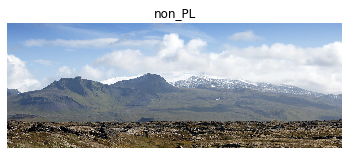

In [73]:
for image, label in labeled_train_ds.take(1):
    print(type(image))
    print(label)
    show(image, label)


In [76]:
for img, label in labeled_train_ds.take(2):
    print(img[0])

tf.Tensor(
[[0.57254905 0.1137255  0.04705883]
 [0.56078434 0.10196079 0.03529412]
 [0.56078434 0.10196079 0.03529412]
 ...
 [0.34901962 0.3019608  0.3019608 ]
 [0.34117648 0.3019608  0.29803923]
 [0.29803923 0.25882354 0.2627451 ]], shape=(1599, 3), dtype=float32)
tf.Tensor(
[[0.10980393 0.29803923 0.07058824]
 [0.12941177 0.4431373  0.17254902]
 [0.14117648 0.5254902  0.22352943]
 ...
 [0.03137255 0.0509804  0.02745098]
 [0.03529412 0.04313726 0.03137255]
 [0.03137255 0.03921569 0.02745098]], shape=(1599, 3), dtype=float32)


In [72]:
type(test_img[0])

tensorflow.python.framework.ops.EagerTensor

In [117]:
def test_gen():
    
    if train_test == 'train':
        for image, label in labeled_train_ds.take(batch_size):
            test_list.append((image, label))
    else:
        for image, label in labeled_test_ds.take(batch_size):
            test_list.append((image, label))
    yield test_list

In [112]:
testing =  test_gen(5)
    

In [2]:
img_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_data_gen = img_gen.flow_from_directory(directory='baseline/baseline_train/',
                                                    batch_size=8,
                                                    shuffle=False,
                                                    target_size=(298,799),
                                                    class_mode='binary',
                                                    classes=['non_PL','PL'])
test_data_gen = img_gen.flow_from_directory(directory='baseline/baseline_test/',
                                                   batch_size=8,
                                                   shuffle=True,
                                                   target_size=(298,799),
                                                   class_mode='binary',
                                                   classes=['non_PL','PL'])

Found 1814 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


In [ ]:
596,1599

In [27]:
596/2

298.0

In [124]:
type(train_data_gen)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [126]:
type(test_gen(5,'test'))

generator

In [15]:
img_test = train_data_gen[0][0]

In [6]:
for img in img_test:
    i = Image.fromarray(img, 'RGB')
    i.show()

In [5]:
img_test[0].shape

(596, 1599, 3)

In [ ]:
Image.fromarray(train_data_gen[0][0][18], 'RGB')


In [5]:
import os

In [6]:
checkpoint_prefix = os.path.join('model_checkpoints/', "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(5,5), activation='relu', input_shape=(298,799,3)))
#model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(16,(5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 294, 795, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 287, 788, 16)      32784     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 394, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 901472)            0         
_________________________________________________________________
dense (Dense)                (None, 48)                43270704  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 49        
Total params: 43,305,969
Trainable params: 43,305,969
Non-trainable params: 0
____________________________________________

In [35]:
history = model.fit(train_data_gen, epochs=6,
                    validation_data=(test_data_gen)
                              #steps_per_epoch=64
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 114 steps, validate for 16 steps
Epoch 1/6
114/114 [==============================] - 339s 3s/step - loss: 4.3328 - accuracy: 0.6125 - val_loss: 0.6890 - val_accuracy: 0.6545
Epoch 2/6
114/114 [==============================] - 339s 3s/step - loss: 0.6873 - accuracy: 0.6571 - val_loss: 0.6856 - val_accuracy: 0.6463
Epoch 3/6
114/114 [==============================] - 339s 3s/step - loss: 0.6813 - accuracy: 0.6610 - val_loss: 0.6796 - val_accuracy: 0.6585
Epoch 4/6
114/114 [==============================] - 340s 3s/step - loss: 0.6766 - accuracy: 0.6626 - val_loss: 0.6755 - val_accuracy: 0.6545
Epoch 5/6
114/114 [==============================] - 340s 3s/step - loss: 0.6753 - accuracy: 0.6555 - val_loss: 0.6723 - val_accuracy: 0.6545
Epoch 6/6
114/114 [==============================] - 340s 3s/step - loss: 0.6852 - accuracy: 0.6621 - val_loss: 0.6687 - val_accuracy: 0.6545


In [44]:
history.params

{'batch_size': None,
 'epochs': 6,
 'steps': 114,
 'samples': 114,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(5,5), activation='relu', input_shape=(298,799,3)))
#model.add(keras.layers.MaxPooling2D((4,4)))
model.add(keras.layers.Conv2D(16,(8,8), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(48, activation='relu'))
#model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
history2 = model.fit(train_data_gen, epochs=40,
                    validation_data=(test_data_gen),
                    callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 227 steps, validate for 31 steps
Epoch 1/40
 48/227 [=====>........................] - ETA: 21:08 - loss: 16.1588 - accuracy: 0.6302

In [38]:
730/1300

0.5615384615384615

In [16]:
history3 = model.fit(train_data_gen, epochs=8,
                    validation_data=(test_data_gen),
                    #callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
Train for 91 steps, validate on 20 samples
Epoch 1/8
91/91 [==============================] - 259s 3s/step - loss: 1.1947 - accuracy: 0.7729 - val_loss: 1.5921 - val_accuracy: 0.6500
Epoch 2/8
91/91 [==============================] - 259s 3s/step - loss: 0.3613 - accuracy: 0.8947 - val_loss: 0.9819 - val_accuracy: 0.6500
Epoch 3/8
91/91 [==============================] - 259s 3s/step - loss: 0.2100 - accuracy: 0.9432 - val_loss: 0.7179 - val_accuracy: 0.6000
Epoch 4/8
91/91 [==============================] - 259s 3s/step - loss: 0.1499 - accuracy: 0.9664 - val_loss: 1.1813 - val_accuracy: 0.7000
Epoch 5/8
91/91 [==============================] - 259s 3s/step - loss: 0.1034 - accuracy: 0.9791 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoch 6/8
91/91 [==============================] - 260s 3s/step - loss: 0.0854 - accuracy: 0.9829 - val_loss: 0.9906 - val_accuracy: 0.6500
Epoch 7/8
91/91 [==============================] - 260s 3s/step - loss: 0.0629 - accuracy: 0

In [10]:
history4 = model.fit(train_data_gen, epochs=8,
                    validation_data=(test_data_gen),
                    #callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 91 steps, validate for 13 steps
Epoch 1/8
91/91 [==============================] - 277s 3s/step - loss: 29.9283 - accuracy: 0.6692 - val_loss: 1.9717 - val_accuracy: 0.7724
Epoch 2/8
91/91 [==============================] - 273s 3s/step - loss: 1.0843 - accuracy: 0.7977 - val_loss: 0.6347 - val_accuracy: 0.7642
Epoch 3/8
91/91 [==============================] - 272s 3s/step - loss: 0.2961 - accuracy: 0.9085 - val_loss: 0.6519 - val_accuracy: 0.7967
Epoch 4/8
91/91 [==============================] - 272s 3s/step - loss: 0.1532 - accuracy: 0.9504 - val_loss: 0.9238 - val_accuracy: 0.7602
Epoch 5/8
91/91 [==============================] - 272s 3s/step - loss: 0.0986 - accuracy: 0.9675 - val_loss: 0.6023 - val_accuracy: 0.8089
Epoch 6/8
91/91 [==============================] - 273s 3s/step - loss: 0.0661 - accuracy: 0.9829 - val_loss: 0.6021 - val_accuracy: 0.8008
Epoch 7/8
91/91 [==============================] - 273s 3s/step - l

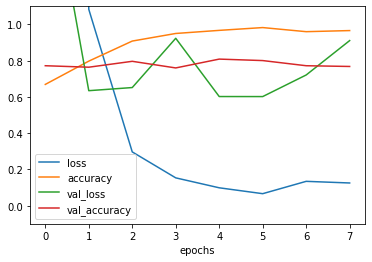

In [12]:
for key, value in history4.history.items():
    plt.plot(value, label=key)
    plt.ylim(-.1,1.1)
    plt.legend()
    plt.xlabel('epochs')

In [ ]:
history5 = model.fit(train_data_gen, epochs=15,
                    validation_data=(test_data_gen),
                    callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 91 steps, validate for 13 steps
Epoch 1/15
91/91 [==============================] - 774s 9s/step - loss: 15.0264 - accuracy: 0.5766 - val_loss: 0.6730 - val_accuracy: 0.6423
Epoch 2/15
91/91 [==============================] - 772s 8s/step - loss: 0.6452 - accuracy: 0.6830 - val_loss: 0.6359 - val_accuracy: 0.6504
Epoch 3/15
91/91 [==============================] - 772s 8s/step - loss: 0.5434 - accuracy: 0.7635 - val_loss: 0.6726 - val_accuracy: 0.6789
Epoch 4/15
91/91 [==============================] - 773s 8s/step - loss: 0.3746 - accuracy: 0.8754 - val_loss: 0.9141 - val_accuracy: 0.6545
Epoch 5/15
90/91 [============================>.] - ETA: 8s - loss: 0.2459 - accuracy: 0.9292 

In [12]:
history6 = model.fit(train_data_gen, epochs=8,
                    steps_per_epoch=90,
                    validation_data=(test_data_gen),
                    #callbacks=[checkpoint_callback]
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 13 steps
Epoch 1/8
60/90 [===================>..........] - ETA: 4:10 - loss: 19.0749 - accuracy: 0.5767

KeyboardInterrupt: 

In [24]:
model2 = keras.models.Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(596,1599,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(52, activation='relu'),
    Dense(1)
])

In [23]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 596, 1599, 16)     448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 298, 799, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 298, 799, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 399, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 149, 399, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 199, 64)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 942464)           

In [27]:
model.compile(optimizer='rmsprop')

ValueError: The model cannot be compiled because it has no loss to optimize.

In [25]:
history4 = model2.fit(train_data_gen, epochs=8,
                    validation_data=(test_data_gen),
                    callbacks=[checkpoint_callback]
                   )

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.